In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

# Problem 1

## (a)

In [2]:
ff = pd.read_csv('data/F-F_Research_Data_Factors.csv')
avg_monthly_ff = ff['Mkt-RF'].mean() # unsure if this means relative returns or average rate of return
volatility_ff = ff['Mkt-RF'].std()
sharpe_ratio_ff = (ff['Mkt-RF']/volatility_ff).mean()
print("The average monthly return of the market is ")
print(avg_monthly_ff)
print("the volatility is")
print(volatility_ff)
print("The average monthly Sharpe Ratio is")
print(sharpe_ratio_ff)

The average monthly return of the market is 
0.670103448275862
the volatility is
5.352554226265551
The average monthly Sharpe Ratio is
0.12519321055872606


## (b) 

In [3]:
sdf = pd.read_csv('data/ps1_strategies.csv')
avg_monthly_sdf = sdf.CA.mean()
volatility_sdf = sdf.CA.std() # Not sure if this works for excess returns or if I need to subtract the risk free rate
sharpe_ratio_sdf = (sdf.CA/volatility_sdf).mean()
print("The average monthly return of the CA is")
print(avg_monthly_sdf)
print("the volatility is")
print(volatility_sdf)
print("The average monthly Sharpe Ratio is")
print(sharpe_ratio_sdf)

The average monthly return of the CA is
0.7339702298342213
the volatility is
2.629358554414979
The average monthly Sharpe Ratio is
0.2791442150793035


## (c)

In [4]:
def generate_capm(strategy_return, market_return, risk_free_rate):
    # Prepare data for regression
    x = market_return - risk_free_rate  # Independent variable (market excess return)
    y = strategy_return  # Dependent variable (strategy excess return)
    x = sm.add_constant(x)  # Add a constant term to the independent variable
    
    # Perform ordinary least squares (OLS) regression
    model = sm.OLS(y, x).fit()
    
    # Extract alpha and beta from the model's parameters
    alpha = model.params[0]
    beta = model.params[1]
    
    # Extract p-value for significance of alpha
    alpha_p_value = model.pvalues[0]
    
    return alpha, beta, alpha_p_value

def generate_cumulative_returns(df):
    return (((df/100)+1).cumprod() - 1)*100

def test_alpha(alpha, p):
    if alpha > 0 and p < 0.05:
        return True, alpha, p
    else:
        return False, alpha, p

## (d)

In [5]:
ff_trim = ff[ff['Month'] >= sdf['date'].min()]
ff_trim = ff_trim[ff_trim['Month'] <= sdf['date'].max()] 
ff_trim = ff_trim.reset_index(drop=True)


In [6]:
alpha, beta, p = generate_capm(sdf.CA.to_numpy(), (ff_trim['Mkt-RF'] + ff_trim['RF']).to_numpy(), ff_trim.RF.to_numpy())
print("The beta of the CA is")
print(beta)
print("The alpha of the CA is")
print(alpha)
print("The significance of the alpha is")
print(p)

The beta of the CA is
0.4887199967980393
The alpha of the CA is
0.3980090854358512
The significance of the alpha is
1.735294201603974e-07


In [7]:
returns = ff_trim.RF + beta*ff_trim['Mkt-RF']

## (f)
does he want excess or total returns?

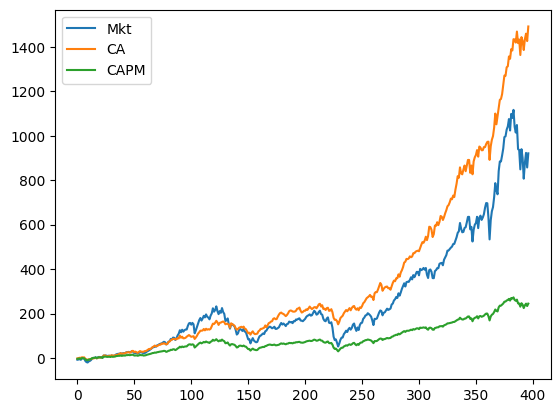

In [8]:
#plot cumulative returns, market cumulative returns, and CA cumulative returns
plt.plot(generate_cumulative_returns(ff_trim['Mkt-RF']), label='Mkt')
plt.plot(generate_cumulative_returns(sdf.CA), label='CA')
plt.plot(generate_cumulative_returns(returns - ff_trim.RF), label='CAPM')
plt.legend()

## (g)
This strategy seems to generate a good amount of alpha, so it would seem like a good strategy from that point of view. There could be some downside, though, as it seems to follow the market trends fairly closely and could lead to higher losses in a market downturn. 


# Problem 2

In [9]:
strats = pd.read_csv("data/ps1_strategies.csv")
strats

,date,CA,LBHA,LSA,TA,HV,LV,NA,LB,HB
0,199001,-1.771984,1.498262,-7.457500,1.679061,-7.271919,0.022091,-5.392944,-1.353457,-22.772632
1,199002,1.418966,3.642659,1.054500,0.205289,-0.986167,0.062055,-1.768405,-2.118514,5.151408
2,199003,1.375007,1.737180,1.738500,-1.572688,-0.018665,0.341639,-0.333926,1.452434,4.480134
3,199004,-0.395588,0.734520,-3.192000,2.474704,-3.294381,0.253568,-2.578905,2.123740,-10.101798
4,199005,2.588010,1.298923,7.999000,0.754379,8.038877,-0.113650,1.337511,-1.555230,26.259080
...,...,...,...,...,...,...,...,...,...,...
392,202209,-2.640759,0.341477,1.206628,-8.882500,-8.396274,0.138919,-8.208565,4.911723,-27.800254
393,202210,3.290022,2.849030,1.965639,7.438500,7.728801,0.099102,3.743379,2.064744,24.367165
394,202211,1.615024,0.474610,0.054055,4.370000,4.132530,0.025099,4.448278,0.730237,14.882494
395,202212,-2.144610,0.503661,1.172292,-6.089500,-3.276646,0.290945,-2.127425,-2.965015,-18.772379


In [10]:
def analyze_strategy(strat="CA", ff=pd.read_csv('data/F-F_Research_Data_Factors.csv')):
    '''
    strategy: dataframe with columns 'date' and 'CA'
    ff: dataframe with columns 'Month', 'Mkt-RF', and 'RF'
    '''
    # Trim ff to match strategy
    sdf = pd.read_csv('data/ps1_strategies.csv')
    strategy = sdf[strat]
    ff_trim = ff[ff['Month'] >= sdf['date'].min()]
    ff_trim = ff_trim[ff_trim['Month'] <= sdf['date'].max()] 
    ff_trim = ff_trim.reset_index(drop=True)
    
    # Calculate strategy returns
    avg_monthly = strategy.mean()
    volatility = strategy.std()
    sharpe_ratio = (strategy/volatility).mean()
    
    # Calculate CAPM
    alpha, beta, p = generate_capm(strategy.to_numpy(), (ff_trim['Mkt-RF'] + ff_trim['RF']).to_numpy(), ff_trim.RF.to_numpy())
    
    # Calculate cumulative returns
    returns = ff_trim.RF + beta*ff_trim['Mkt-RF']   

    plt.figure()
    plt.plot(generate_cumulative_returns(ff_trim['Mkt-RF']), label='Mkt')
    plt.plot(generate_cumulative_returns(strategy), label=strat)
    plt.plot(generate_cumulative_returns(returns - ff_trim.RF), label='CAPM for ' + strat + ' without alpha')
    plt.legend()
    
    print("------- For strategy " + strat + ": -------")
    print("The average monthly return of the strategy is ")
    print(avg_monthly)
    print("the volatility is")
    print(volatility)
    print("The average monthly Sharpe Ratio is")
    print(sharpe_ratio)
    print("The beta of the strategy is")
    print(beta)
    print("The alpha of the strategy is")
    print(alpha) 
    is_significant, alpha_value, p_value = test_alpha(alpha, p)

    if is_significant:
        print(f"Alpha is positive ({alpha_value}) and significant at the 5% level (p-value: {p_value}).")
    else:
        print(f"Alpha is not positive and significant at the 5% level (alpha: {alpha_value}, p-value: {p_value}).")

    print()
    
    return avg_monthly, volatility, sharpe_ratio, beta, alpha

------- For strategy LSA: -------
The average monthly return of the strategy is 
0.7486271836229957
the volatility is
3.1723253621783742
The average monthly Sharpe Ratio is
0.23598688600747053
The beta of the strategy is
0.3915663888474702
The alpha of the strategy is
0.47945241490671553
Alpha is positive (0.47945241490671553) and significant at the 5% level (p-value: 0.00041580942315764353).

------- For strategy TA: -------
The average monthly return of the strategy is 
0.7527404182120594
the volatility is
3.4570217361430458
The average monthly Sharpe Ratio is
0.21774246032131753
The beta of the strategy is
0.5077677902172448
The alpha of the strategy is
0.40368523526951955
Alpha is positive (0.40368523526951955) and significant at the 5% level (p-value: 0.002530552175805163).

------- For strategy HV: -------
The average monthly return of the strategy is 
0.7132774373094984
the volatility is
3.8356279861751945
The average monthly Sharpe Ratio is
0.1859610577147664
The beta of the st

(0.46731498403049637,
 1.9267646547507409,
 0.24253869453036617,
 0.02090548678104484,
 0.45294390998159206)

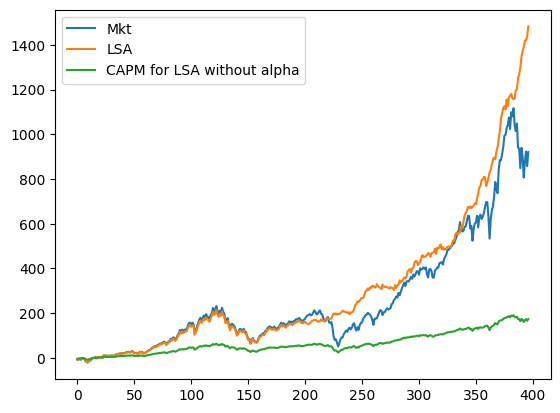

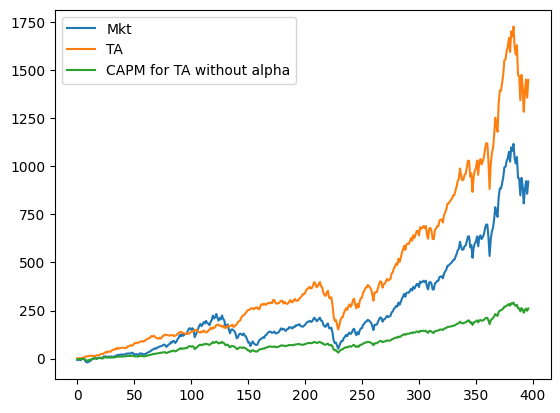

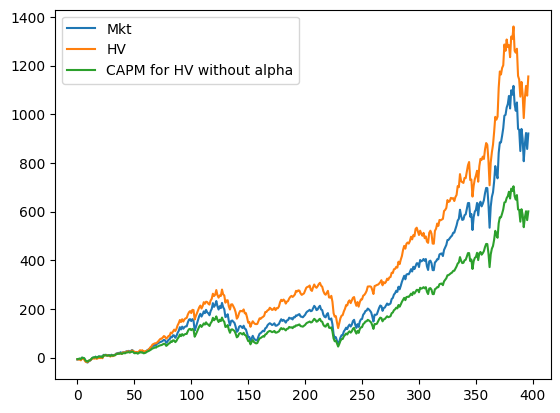

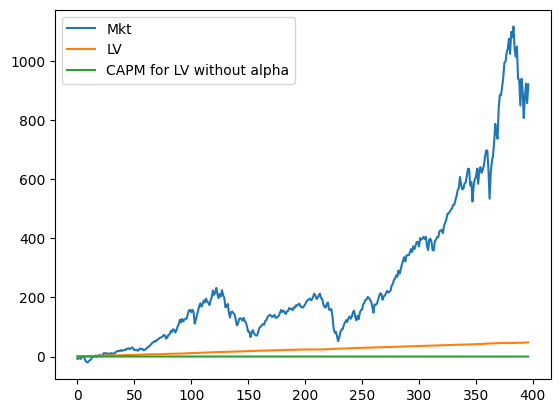

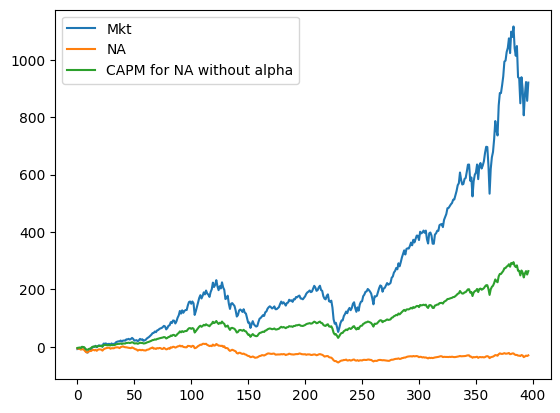

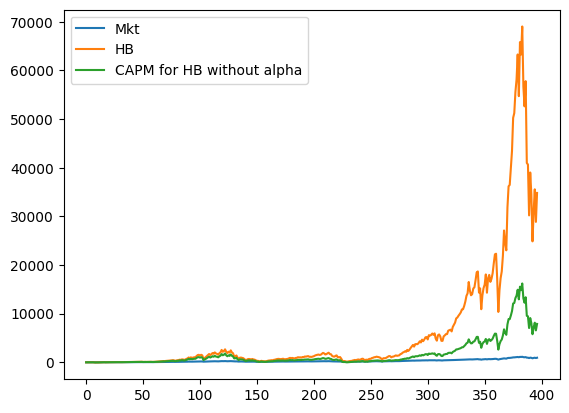

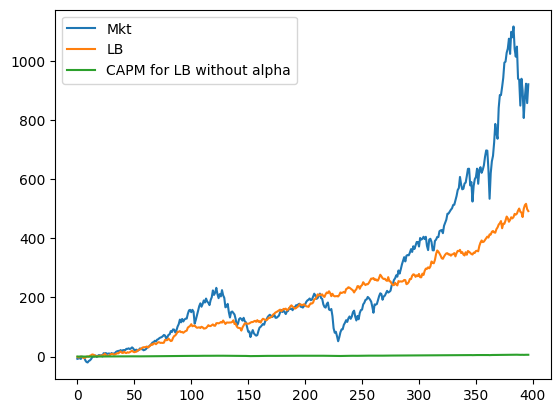

In [11]:
analyze_strategy("LSA")
analyze_strategy("TA")
analyze_strategy("HV")
analyze_strategy("LV")
analyze_strategy("NA")
analyze_strategy("HB")
analyze_strategy("LB")

## A.
LBHA seems to beat the market during market downturns, while it loses out when the market is doing exceptionally well.

## B.
We have positive alpha and it is significant.  It has high volatility so that could be one of the issues. To allay concerns, we could point to the relatively low beta and show htat the strategy is fairly uncorrelated with the market, so it is properly hedged. 

## C.
TA also has a positive significant alpha. It does seem like a strategy investors would be interested in given the amount of alpha generated. 

## D. 
Both have significant and positive alpha. The HV strategy is much more correlated with the market given the high beta, and much more suceptible to downturns in the market, so a hedge fund investor likely would not be as interested in HV strategy vs the LV strategy, which generates slightly less alpha but is a much more safe investment. 

## E. 
The strategy is not all for nothing, we could short the strategy instead, giving us a positive alpha! It could also give you insights for other strategies that could yield positive alpha instead. 

## F. 
It likely depends on what you're looking for as an investor. Most hedge fund investors would look for more consistent returns even during downturn, which the LB strategy does far better than the HB one in that regard. Both have significant and high alpha, with the LB one being higher, with less volatility, so i'd say this one performs better.


Problem 3
note: confirm that by "cumulative" he really means "current" value

In [12]:
np.seterr(all='raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [13]:
def calculate_after_fee_returns(before_fee_returns, management_fee_pct, incentive_fee_pct):
    # Convert management and incentive fees to decimals
    management_fee = management_fee_pct / 100
    incentive_fee = incentive_fee_pct / 100
    
    # Initialize variables
    after_fee_returns = []
    max_value = 1
    current_value = 1
    
    for ret in before_fee_returns:
        ret = ret/100
        # Calculate current value before fees
        if 1+ret < 0: print("wtf")
        current_value *= (1 + ret)
        
        # Calculate management fee and incentive fee
        management_fee_amount = current_value * management_fee
        incentive_fee_amount = max(0, current_value - max_value) * incentive_fee
        
        # Calculate after-fee value and return
        after_fee_value = current_value - management_fee_amount - incentive_fee_amount
        after_fee_return = (after_fee_value / max_value) - 1 if max_value > 0 else 0
        after_fee_returns.append(after_fee_return)
        
        # Update max_value
        max_value = max(max_value, after_fee_value)
        
        # Update current_value for next iteration
        current_value = after_fee_value
    
    return after_fee_returns


In [20]:
def fee_analysis2(investment_amount, strat="CA", ff=pd.read_csv('data/F-F_Research_Data_Factors.csv')):
    '''
    strategy: dataframe with columns 'date' and 'CA'
    ff: dataframe with columns 'Month', 'Mkt-RF', and 'RF'
    '''
    # Trim ff to match strategy
    sdf = pd.read_csv('data/ps1_strategies.csv')
    strategy = sdf[strat]
    ff_trim = ff[ff['Month'] >= sdf['date'].min()]
    ff_trim = ff_trim[ff_trim['Month'] <= sdf['date'].max()] 
    ff_trim = ff_trim.reset_index(drop=True)

    # Calculate before-fee alphas and betas (part a)
    alpha_1, beta_1, p_1 = generate_capm(strategy.to_numpy(), (ff_trim['Mkt-RF'] + ff_trim['RF']).to_numpy(), ff_trim.RF.to_numpy())
# Calculate maximum return at each time point
    after_fee_returns = calculate_after_fee_returns(strategy.to_numpy(), 1.8/12, 20)


    # Calculate CAPM
    alpha_2, beta_2, p_1 = generate_capm(after_fee_returns, (ff_trim['Mkt-RF'] + ff_trim['RF']).to_numpy(), ff_trim.RF.to_numpy())
    
    total_fees = np.sum(strategy.to_numpy() - (np.array(after_fee_returns)) * investment_amount)

    return alpha_1, beta_1, alpha_2, beta_2, total_fees
    
    

In [21]:
def total_analysis(strats=["LB", "HB"], ff=pd.read_csv('data/F-F_Research_Data_Factors.csv')):
    # bf = before fee
    # af = after fee

    bf_alpha = []
    bf_beta = []
    af_alpha = []
    af_beta = []
    tot_fees = []
    for strat in strats:
        alpha_1, beta_1, alpha_2, beta_2, tot_fee = fee_analysis2(100000000, strat=strat, ff=ff)
        bf_alpha.append(alpha_1)
        bf_beta.append(beta_1)
        af_alpha.append(alpha_2)
        af_beta.append(beta_2)
        tot_fees.append(tot_fee)
        #tot_fees.append(tot_fee)
    
    hund_mill_fee = np.array(tot_fees)
    print(tot_fees)
    #hund_mill_fee = np.array(tot_fees) * 1e8
    print(hund_mill_fee.shape)
    higher_fee = np.argmax(hund_mill_fee)
    
    print("Part a \n----------------")
    for i in range(len(strats)):
        print(
        """strategy: {s}
        before-fee alpha: {a}
        before-fee beta: {b}""".format(s=strats[i], a=bf_alpha[i], b=bf_beta[i]))
    
    print("\nPart b \n----------------")
    for i in range(len(strats)):
        print("""strategy: {s}
        after-fee alpha: {a}
        after-fee beta: {b}""".format(s=strats[i], a=af_alpha[i], b=af_beta[i]))

    print("\nPart c \n----------------")
    print("Strategy {s} has higher fees after a $100 million investment.".format(s=strats[higher_fee]))
    # Explanation for HB = higher fees: 
    print("""The HB strategy has greater volatility since it is more closely correlated to the market valuation. 
        Thus, the HB strategy is capable of growing at a faster rate than the LB strategy. Since the fees are based
        on the size of the fund, a faster-growing fund (HB) will accrue higher fees at a faster rate.""")

    print("\nPart d \n----------------")
    print("""As a hedge fund manager, I would choose {high} since it results in higher fees (which I gain)
    As a client, I would choose {low} since it results in lower fees (which are a cost to me)""".format(
        high=strats[higher_fee], low=strats[1-higher_fee]))


In [22]:
total_analysis()

[1161141666.1570086, 12441935787.923853]
(2,)
Part a 
----------------
strategy: LB
        before-fee alpha: 0.45294390998159206
        before-fee beta: 0.02090548678104484
strategy: HB
        before-fee alpha: 0.3725046631158167
        before-fee beta: 2.9978735923008775

Part b 
----------------
strategy: LB
        after-fee alpha: -0.029439801719315584
        after-fee beta: 0.00027916337341500483
strategy: HB
        after-fee alpha: -0.3241434628595389
        after-fee beta: 0.01563008514286318

Part c 
----------------
Strategy HB has higher fees after a $100 million investment.
The HB strategy has greater volatility since it is more closely correlated to the market valuation. 
        Thus, the HB strategy is capable of growing at a faster rate than the LB strategy. Since the fees are based
        on the size of the fund, a faster-growing fund (HB) will accrue higher fees at a faster rate.

Part d 
----------------
As a hedge fund manager, I would choose HB since it resu